**Exemplo do algoritmo não supervisionado k-means**


In [ ]:
#importa as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
#cria dados aleatorios
dados = {'x': [25, 34, 22, 27, 33, 33, 31, 22, 35, 36, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38, 41, 51, 46],
         'y': [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 20, 5, 29, 27, 8, 7]
         }

In [ ]:
#cria o dataframe
df = DataFrame(dados,columns=['x','y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [ ]:
# adiciona as bibliotecas para construir o algoritmo
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)  #cria o objeto de para o algoritmo k-means para encontrar 2 clusters
kmeans.fit(df) #aplica o algoritmo
centroides = kmeans.cluster_centers_  #encontra as cooredenadas dos centroides
print(centroides)

[[46.92857143 22.14285714]
 [38.875      61.625     ]]


Text(0, 0.5, 'y')

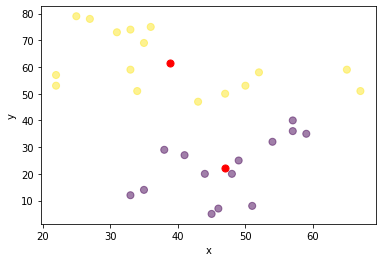

In [ ]:
# realiza o plot do gráfico da saída
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)
plt.xlabel("x")
plt.ylabel("y")

**Exemplo do algoritmo Supervisionado - KNN**

In [ ]:
#importando as bibliotecas
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [ ]:
# cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()

In [ ]:
#converte o bando de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# transforma os dados em array
x = df_iris.iloc[:, :-1].values #dados de entrada
y = df_iris.iloc[:, 4].values  #saidas ou target

In [ ]:
# realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split # função que realiza a divisão do dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)#divide 20% para teste

In [ ]:
# realiza o processo de normalidade dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #objeto que normaliza os dados
scaler.fit(x_train) #realiza a normalização dos dados

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# treina o modelo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(x_train, y_train) #aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#realiza a previsão
y_pred = classifier.predict(x_test)

In [ ]:
# constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.80      0.89      0.84         9
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



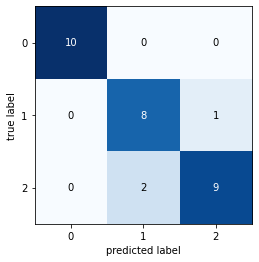

In [ ]:
# realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo do algoritmo Supervisionado - Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Importa o classificador árvore de decisão
from sklearn import metrics  #importa as métricas para avaliação

In [ ]:
#Cria o objeto de classificação através do
clf = DecisionTreeClassifier()

In [ ]:
# Realiza o treinamento do classificador
clf = clf.fit(x_train,y_train)

In [ ]:
# Realiza a previsão de classificação
y_pred = clf.predict(x_test)

**Avaliando o modelo**

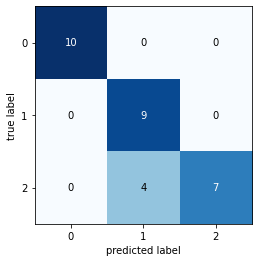

In [ ]:
# realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig. ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
# Visualização da arvore de decisão
#impor das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
# constroi a árvore de decisão para o DB Iris
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png)

/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'function'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

**Exemplo do algoritmo Supervisionado - Supor Vector Machine (SVM)**

In [ ]:
# Biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

In [ ]:
# realiza o objeto SVM
clf = SVC(gamma='auto')

In [ ]:
# realiza a classificação via SVM
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Realiza a previsão de classificação
y_pred = clf.predict(x_test)

**Avaliando o modelo**

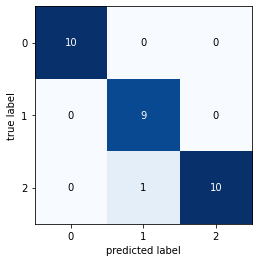

In [ ]:
# realiza o plot da matriz confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

# **Exemplo de Redes Neurais**

**Implementação das RNA e deep learning**

**Exemplo de Redes Neurais**

In [ ]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 5), random_state=1) #rede com escondidas com e neurônios cada

In [ ]:
#realiza o fit do modelo
clf.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# realiza a previsão
y_pred+clf.predict(x_test)

array([0., 0., 2., 2., 4., 2., 4., 4., 4., 0., 4., 2., 0., 4., 0., 3., 0.,
       0., 2., 2., 0., 0., 4., 2., 0., 3., 4., 2., 2., 3.])

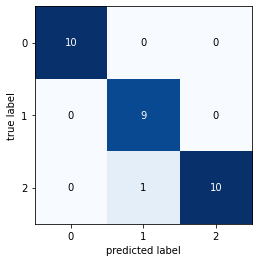

In [37]:
# Avaliando o modelo

# realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Rede Neural em deep learning com o TensorFlow**

In [38]:
from tensorflow.keras.layers import Input, Dense, Dropout, Activation #importando as camadas a serem utilizadas
from tensorflow.keras.models import Model # importando o modelo a ser empregado
import seaborn as sns #plotar gráficos


In [39]:
dataset = sns.load_dataset('iris') #importando o dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
# Dividindo entre entrada e saída
X = dataset.drop(['species'], axis=1)
Y = pd.get_dummies(dataset.species, prefix='output') # transforma cada uma das classes em vetores

In [41]:
X.head() #entradas

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
Y.head() #saidas

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
# divide os dados entre treinamento e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=39)

In [44]:
from sklearn.preprocessing import StandardScaler # aplica a normalização dos dados
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
entrada = Input(shape=(x_train.shape[1],))
camada_1 = Dense(100, activation='relu')(entrada)
camada_2 = Dense(50, activation='relu')(camada_1)
camada_3 = Dense(25, activation='relu')(camada_2)
saida = Dense(y_train.shape[1], activation='softmax')(camada_3)

In [46]:
model = Model(inputs = entrada, outputs= saida) #define o modelo

In [47]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
Total params: 6,903
Trainable params: 6,903
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [51]:
# realizando o treinamento da nossa rede
history = model.fit(x_train, y_train, batch_size=4, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
24/24 [==============================] - 0s 10ms/step - loss: 0.8832 - acc: 0.6354 - val_loss: 0.8017 - val_acc: 0.5417
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5563 - acc: 0.7188 - val_loss: 0.6545 - val_acc: 0.6667
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 0.4345 - acc: 0.7604 - val_loss: 0.5557 - val_acc: 0.7083
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3467 - acc: 0.8542 - val_loss: 0.4325 - val_acc: 0.7917
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2570 - acc: 0.9375 - val_loss: 0.3254 - val_acc: 0.9167
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2038 - acc: 0.9062 - val_loss: 0.2551 - val_acc: 0.9167
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1745 - acc: 0.9479 - val_loss: 0.3268 - val_acc: 0.8333
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 0.1189 - acc: 0.9

In [52]:
acuracia=model.evaluate(x_test, y_test, verbose=1) #acurácia do modelo

print("Acurácia do modelo: ", acuracia[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.2498 - acc: 0.9000
Acurácia do modelo:  0.8999999761581421
